# Parte 2 - Polynomial Model - Predict Wine Quality

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
from google.colab import drive 
from scipy.stats import norm
#SkLearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split
#Tensoflow
import tensorflow as tf

In [2]:
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


# Exploratory data analysis

In [4]:
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Shape of dataset

In [ ]:
data.shape

(1599, 12)

## Info of the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Missing Values

In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.groupby("quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


## Mutual Information 
<br>
Mutual Information can help to understand the relative potential of a feature as a predictor of the target, considered by itself.
 

In [ ]:
def make_mi_scores(X, Y):
    mi_scores = mutual_info_regression(X, Y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
X = data.copy()
Y = X.pop("quality")
mi_scores = make_mi_scores(X, Y)
mi_scores

alcohol                 0.196602
sulphates               0.116222
volatile acidity        0.104630
density                 0.101823
citric acid             0.072775
total sulfur dioxide    0.061440
chlorides               0.058048
fixed acidity           0.035953
residual sugar          0.032412
pH                      0.028025
free sulfur dioxide     0.002808
Name: MI Scores, dtype: float64

## Correlation matrix



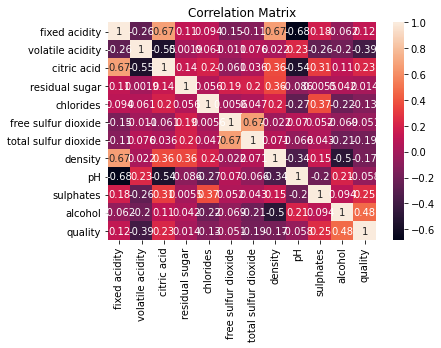

In [ ]:
ax = plt.axes()
sns.heatmap(data.corr(), annot=True, ax = ax)
ax.set_title('Correlation Matrix')
plt.show()

## Mutual information vs Correlation Matrix

- Mutual information is a lot like correlation in that it measures a relationship between two quantities. The advantage of mutual information is that it can detect any kind of relationship, while correlation only detects linear relationships.

- Mutual information describes relationships in terms of uncertainty. The mutual information (MI) between two quantities is a measure of the extent to which knowledge of one quantity reduces uncertainty about the other

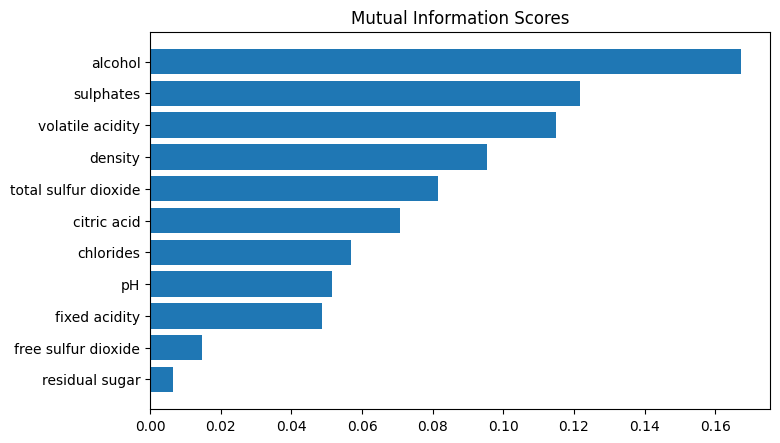

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

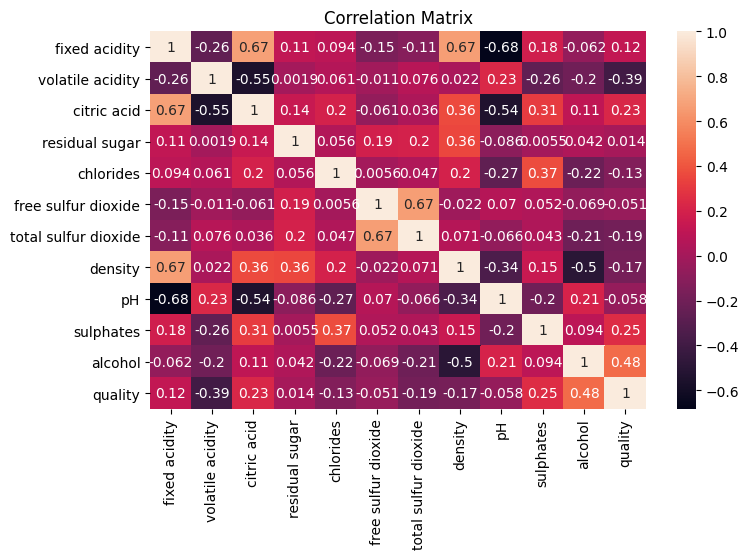

In [ ]:
plt.figure(dpi=100, figsize=(8, 5))
ax = plt.axes()
sns.heatmap(data.corr(), annot=True, ax = ax)
ax.set_title('Correlation Matrix')
plt.show()

## Final Dataset

In [5]:
data_poly = data.filter(["alcohol", "sulphates"])
data_poly.head()

,alcohol,sulphates
0,9.4,0.56
1,9.8,0.68
2,9.8,0.65
3,9.8,0.58
4,9.4,0.56


## Variable transformation

### Polynomial degree 2
$[1,a,b,a^{2},b^{2},ab]$

In [6]:
poly = PolynomialFeatures(2)
data_poly = poly.fit_transform(data_poly)
data_poly

array([[  1.    ,   9.4   ,   0.56  ,  88.36  ,   5.264 ,   0.3136],
       [  1.    ,   9.8   ,   0.68  ,  96.04  ,   6.664 ,   0.4624],
       [  1.    ,   9.8   ,   0.65  ,  96.04  ,   6.37  ,   0.4225],
       ...,
       [  1.    ,  11.    ,   0.75  , 121.    ,   8.25  ,   0.5625],
       [  1.    ,  10.2   ,   0.71  , 104.04  ,   7.242 ,   0.5041],
       [  1.    ,  11.    ,   0.66  , 121.    ,   7.26  ,   0.4356]])

In [7]:
x = data_poly
y = data.filter(["quality"])

## Train-Test Split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
print(y_train.shape)
print(x_train.shape)

(1279, 1)
(1279, 6)


In [10]:
tf.reset_default_graph()
g = tf.Graph()
n = len(x_train)
with g.as_default():
  tensor_x = tf.placeholder(tf.float32,[None, 6],"tensor_x")
  tensor_y = tf.placeholder(tf.float32,[None, 1],"tensor_y")
  learning_rate = tf.placeholder("float") 

  #Parameters
  with tf.name_scope("parameters"):
    m = tf.get_variable("weights",dtype=tf.float32,  initializer=tf.zeros(6,1))
    b = tf.get_variable("b",dtype=tf.float32, initializer=tf.zeros(1))

  # Hypothesis
  with tf.name_scope("hypothesis"):
   y_pred = tf.add(tf.multiply(m, tensor_x), b)
    
  # Mean Squared Error Cost Function
  with tf.name_scope("Error-function"):
    cost = tf.reduce_sum(tf.pow(y_pred-tensor_y, 2)) / 1/2
    #Cost to Tensorboard  
    cost_summary = tf.summary.scalar("cost", cost)

  with tf.name_scope("Gradient"):

    #Goal: Gradient Descent Optimizer
    optimizer = tf.gradients(cost ,[m,b])  
    actualizacion_m = tf.assign(m, m - learning_rate*optimizer[0] )
    actualizacion_b = tf.assign(b, b - learning_rate*optimizer[1] )
    actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

  # Global Variables Initializer
  init = tf.global_variables_initializer()

### Tensorboard

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/wine/graph2.png?raw=true" />


### Mini batch Gradient Descent

In [11]:
def polynomial_model(lr, epochs, batch_size, x, y):
  now = datetime.now()
  total_iteraciones = int(n/batch_size)
  with tf.train.MonitoredSession() as session:
    session = tf.Session(graph = g)
    session.run(init)
    writer = tf.summary.FileWriter("exp/"+str(now)+"n="+str(epochs)+" lr="+str(lr), session.graph)
    for epoch in range(epochs): 
      for i in range(total_iteraciones): 
        muestra_inicio = i*batch_size
        muestra_fin = muestra_inicio + batch_size

        #nuevo arreglo de muestra mas pequena
        x_mb =  np.array(x[muestra_inicio:muestra_fin]).reshape([-1,6])
        y_mb = np.array(y[muestra_inicio:muestra_fin]).reshape([-1,1])
        #print(y_mb.shape, x_mb.shape)
        
        feed_dict = {tensor_x:x_mb, tensor_y:y_mb, learning_rate:lr}
        w=session.run(y_pred,feed_dict=feed_dict)
        session.run([actualizacion_parametros,m,b],feed_dict=feed_dict)

      feed_dict = {tensor_x:np.array(x).reshape(-1,6), tensor_y:np.array(y).reshape(-1,1), learning_rate:lr}
      predicciones, cs = session.run([y_pred, cost_summary] ,feed_dict=feed_dict)
      writer.add_summary(cs, epoch+1)

  pendiente, intercepto = session.run([m,b],feed_dict=feed_dict)
  return pendiente, intercepto


### Experiments

In [14]:
m1_m,m1_b = polynomial_model(0.00001, 1000, 8, x_train, y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [16]:
m1_m,m1_b = polynomial_model(0.00001, 1000, 16, x_train, y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [12]:
m1_m,m1_b = polynomial_model(0.00001, 1300, 8, x_train, y_train)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


### Comparison of the Cost function

<img src="https://github.com/normanaspx/Data-Science/blob/master/resources/wine/train2.PNG?raw=true" />

## Conclusions

- two variables were selected and a polynomial(alcohol, sulphates) of degree two is used for the independent variables after several experiments it is concluded that the best model with a learning_rate = 0.00001, EPOCHS=1300, batch_size=8

In [20]:
#%load_ext tensorboard
#%tensorboard --logdir exp